In this project I have analysed the data of a bank to get the insight about the factor affecting the chances of people accepting to deposit money their bank when they are contacted.

I have used different models to predict the probability of acceptance of the offer by a customer regarding money deposition. 

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [207]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [208]:
#loading data frm csv file to pandas dataframe
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv


In [209]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [210]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [211]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [213]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [214]:
df.shape

(11162, 17)

In [215]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [216]:
bank_client = df.iloc[: , [1,2,3,4,6,7,8,16]]
bank_client.head()

,job,marital,education,default,housing,loan,contact,deposit
0,admin.,married,secondary,no,yes,no,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,yes
3,services,married,secondary,no,yes,no,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,yes


In [217]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


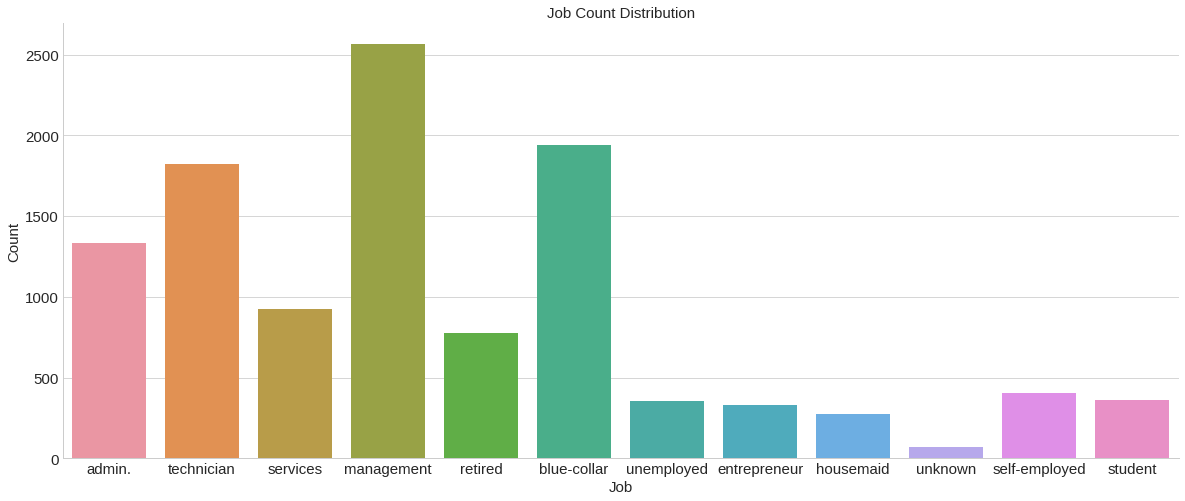

In [218]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [219]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced']


Text(0.5, 1.0, 'Age Count Distribution')

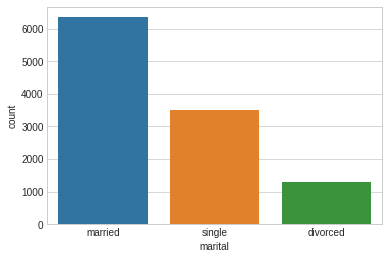

In [220]:
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)

In [221]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['secondary' 'tertiary' 'primary' 'unknown']


Text(0.5, 1.0, 'Education Count Distribution')

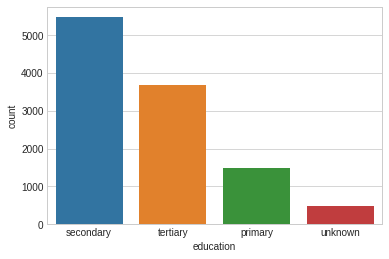

In [222]:
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)

In [223]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'yes']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']


Text(0.5, 1.0, 'Default Count Distribution')

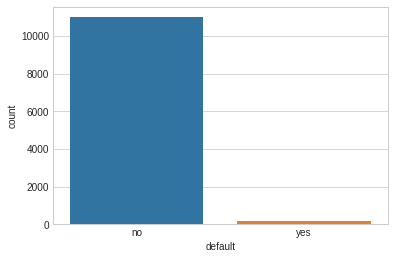

In [224]:
sns.countplot(x = 'default', data = bank_client)
ax.set_xlabel('default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default Count Distribution', fontsize=15)

Text(0.5, 1.0, 'Housing Count Distribution')

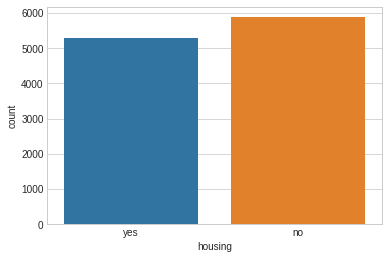

In [225]:
sns.countplot(x = 'housing', data = bank_client)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing Count Distribution', fontsize=15)

Text(0.5, 1.0, 'Loan Count Distribution')

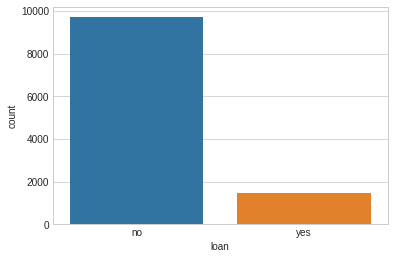

In [226]:
sns.countplot(x = 'loan', data = bank_client)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Count Distribution', fontsize=15)

In [227]:
print('Deposit:\n', bank_client['deposit'].unique())

Deposit:
 ['yes' 'no']


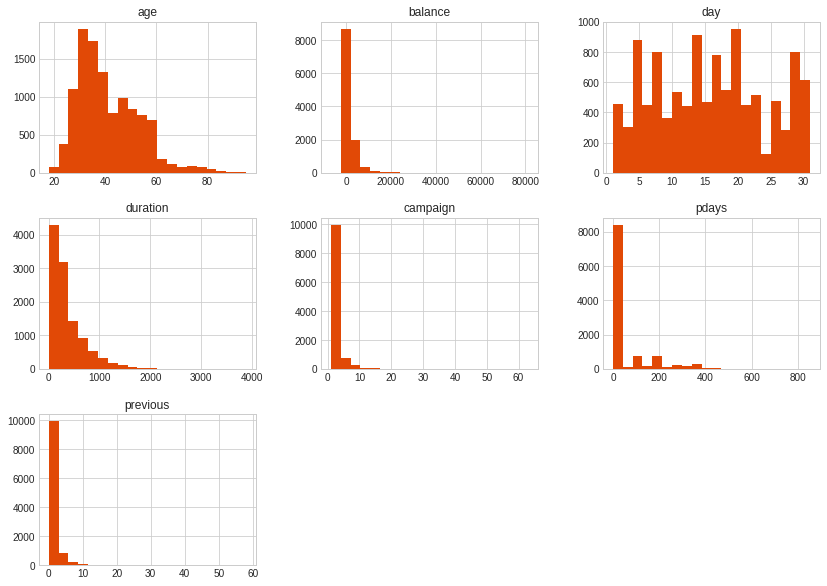

In [228]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [229]:
#sns.set(style="ticks")

#sns.pairplot(df, hue="deposit", palette="Set1")
#plt.show()

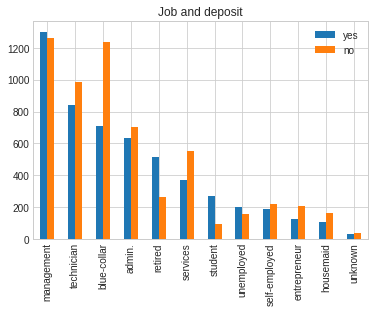

In [230]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

1. Retired people tend to accept the offer as compared to rejection.
2. People in Blue collar Job tend to reject the offer.
3. Students tend to accept the offer.

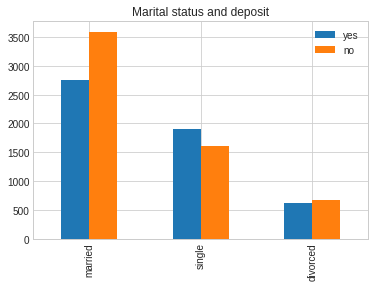

In [231]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

1. Single and Divorced persons have more chances to accept the offer. 

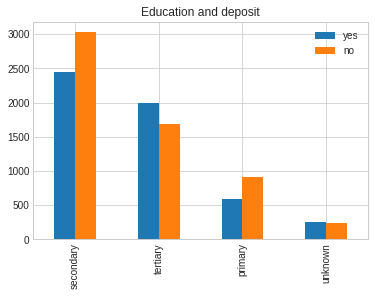

In [232]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

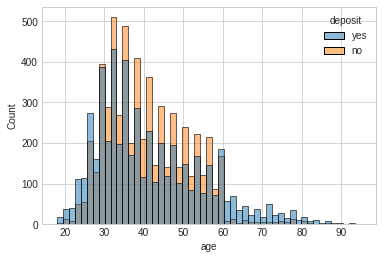

In [233]:
sns.histplot(data=df, x="age", hue="deposit")

People in 20's or people above 60's tend to accept offer.

In [234]:
df=df.drop(['day','month','default','pdays','previous'],axis='columns')

In [235]:
df=df.drop(['poutcome'],axis='columns')

In [236]:
original_data=df

Applying label encoding on binary classification

In [237]:
#applying label encoding on Gender
from sklearn import preprocessing
label_encdr = preprocessing.LabelEncoder()

In [238]:

df['housing']= label_encdr.fit_transform(df['housing'])

In [239]:
df['loan']= label_encdr.fit_transform(df['loan'])

In [240]:
df['deposit']= label_encdr.fit_transform(df['deposit'])

In [241]:
df['job']= label_encdr.fit_transform(df['job'])

In [242]:
df['marital']= label_encdr.fit_transform(df['marital'])

In [243]:
df['education']= label_encdr.fit_transform(df['education'])

In [244]:
df['contact']= label_encdr.fit_transform(df['contact'])

In [245]:
df

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,deposit
0,59,0,1,1,2343,1,0,2,1042,1,1
1,56,0,1,1,45,0,0,2,1467,1,1
2,41,9,1,1,1270,1,0,2,1389,1,1
3,55,7,1,1,2476,1,0,2,579,1,1
4,54,0,1,2,184,0,0,2,673,2,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,0,257,1,0
11158,39,7,1,1,733,0,0,2,83,4,0
11159,32,9,2,1,29,0,0,0,156,2,0
11160,43,9,1,1,0,0,1,0,9,2,0


In [258]:
df.corr()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,0.112300,-0.168700,-0.031418,0.027762,0.000189,-0.005278,0.034901
job,-0.031603,1.000000,0.078314,0.147046,0.028736,-0.136965,-0.067092,-0.087915,0.002432,0.003104,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.002138,-0.036345,-0.062029,-0.060456,0.006781,-0.030794,0.067610
education,-0.126018,0.147046,0.125845,1.000000,0.051728,-0.109168,-0.073154,-0.132540,-0.019122,-0.005327,0.095948
balance,0.112300,0.028736,-0.002138,0.051728,1.000000,-0.077092,-0.084589,-0.027295,0.022436,-0.013894,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,-0.077092,1.000000,0.076761,0.226392,0.035051,0.006660,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,-0.084589,0.076761,1.000000,0.006829,-0.001914,0.034722,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,-0.027295,0.226392,0.006829,1.000000,-0.018000,0.059258,-0.249847
duration,0.000189,0.002432,0.006781,-0.019122,0.022436,0.035051,-0.001914,-0.018000,1.000000,-0.041557,0.451919
campaign,-0.005278,0.003104,-0.030794,-0.005327,-0.013894,0.006660,0.034722,0.059258,-0.041557,1.000000,-0.128081


1. Duratio is highly correlated with Deposit.
   More the customer will talk to client  -> more chances of getting  Deposit

2. Age is positively correlated with Deposit.


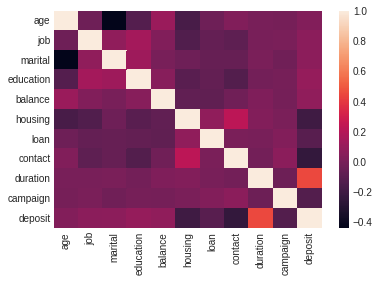

In [259]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


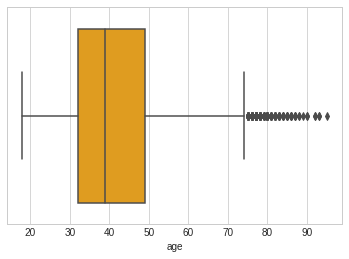

In [260]:
# outlier detection
#AGE
sns.boxplot(df.age, color='orange')

Removing outliers in Age

In [261]:
#calculate upper and lower limits 
upper_limit = df['age'].mean() + 3 * df['age'].std()
lower_limit = df['age'].mean() -3 * df['age'].std()

In [262]:
print(" upper limit for outlier in Age = ",upper_limit )
print(" max of age =",df['age'].max())
print(" lower limit for outlier in age = ",lower_limit )
print(" min of age =",df['age'].min())

 upper limit for outlier in Age =  76.97205525627388
 max of age = 95
 lower limit for outlier in age =  5.491840102980724
 min of age = 18


In [263]:
# Upper bound
upper = np.where(df['age'] >= upper_limit)
# Lower bound
lower = np.where(df['age'] <= lower_limit)

In [264]:
df.shape

(11162, 11)

In [265]:
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


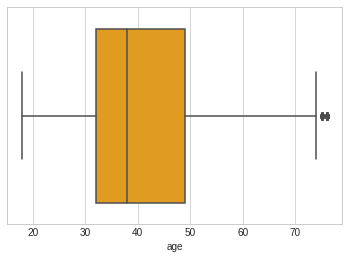

In [266]:
# outliers removed
#AGE
sns.boxplot(df.age, color='orange')

In [267]:
y=df['deposit']

In [268]:
bank_final=df.drop(['deposit'],axis='columns')

In [269]:
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [270]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [271]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[959 193]
 [283 771]]
78.0


In [272]:
LOGCV

0.7821834962750671

k=1 66.75 (+/- 1.65)
k=2 65.97 (+/- 1.29)
k=3 69.57 (+/- 1.44)
k=4 69.25 (+/- 1.61)
k=5 70.83 (+/- 1.35)
k=6 70.42 (+/- 1.69)
k=7 71.42 (+/- 1.29)
k=8 71.10 (+/- 1.69)
k=9 71.86 (+/- 1.16)
k=10 71.57 (+/- 1.33)
k=11 72.14 (+/- 1.32)
k=12 71.89 (+/- 1.41)
k=13 72.54 (+/- 1.38)
k=14 72.48 (+/- 1.32)
k=15 73.01 (+/- 1.28)
k=16 72.63 (+/- 1.37)
k=17 72.99 (+/- 1.22)
k=18 72.71 (+/- 1.51)
k=19 72.95 (+/- 1.46)
k=20 72.71 (+/- 1.63)
k=21 72.91 (+/- 1.47)
k=22 72.97 (+/- 1.74)
k=23 72.95 (+/- 1.39)
k=24 72.79 (+/- 1.56)
k=25 73.13 (+/- 1.33)
The optimal number of neighbors is 24 with 73.1%


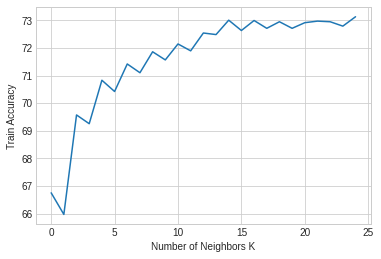

In [273]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    #cv_score is cross validation score
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [274]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[949 203]
 [298 756]]
77.0


In [275]:
from sklearn.svm import SVC
svc= SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[937 215]
 [255 799]]
79.0


In [276]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[853 299]
 [308 746]]
72.0


In [277]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[910 242]
 [204 850]]
80.0


In [278]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[916 236]
 [191 863]]
81.0


#Different Models Analysis:

In [279]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'XGBoost'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, XGB]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,XGBoost,0.805529
0,Random Forest Classifier,0.802131
2,Support Vector Machine,0.785357
4,Logistic Model,0.782183
3,K-Near Neighbors,0.765750
1,Decision Tree Classifier,0.730394


----Xgboost and Random Forest performed better because of Ensamble learning-----

# Overall Analysis: 

1. Age category: 

->People in 20's or people above 60's tend to accept offer.

2. Job Category : 

  A. Retired persons have more tend to accept the offer.

  B. People in Blue collar Job tend to reject the offer.

  c. Students tend to accept the offer.

3. Based on Marital status:

  ->Single and Divorced persons have more chances to accept the offer.

4. Based on Educational Qualification:

  ->People with Higher Education have more chances to accept offer.